# Analysis of the spread of the coronavirus Covid-19 in US 3/24/2020

By Steve Snively<br>
Data source: Ourworldindata.org<br>
DAYS SINCE THE TOTAL CONFIRMED CASES OF COVID-19 REACHED 100<br>
https://ourworldindata.org/a1c06327-96cc-4390-b5fc-5d4a86645d53

In [43]:
#Load dataset
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv("covid-confirmed-cases-since-100th-case.csv")

In [58]:
us = data[data['Code']=='USA'][['Year','Total confirmed cases of COVID-19 (cases)']]
us.set_index('Year')

,Total confirmed cases of COVID-19 (cases)
Year,
-21,0
-20,0
-19,0
-18,0
-17,0
-16,0
-15,0
-14,0
-13,0


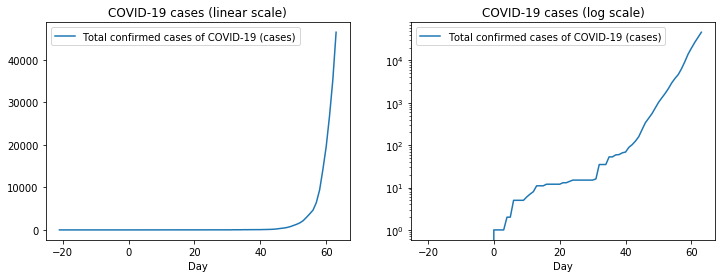

In [86]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
us.plot(ax=axes[0], x='Year',y='Total confirmed cases of COVID-19 (cases)')
axes[0].set_xlabel('Day')
axes[0].set_title('COVID-19 cases (linear scale)')

us.plot(ax=axes[1], x='Year',y='Total confirmed cases of COVID-19 (cases)')
axes[1].set_yscale('log')
axes[1].set_xlabel('Day')
axes[1].set_title('COVID-19 cases (log scale)')

plt.show()

In [104]:
#Calculate the first derivative of cases
us['d1'] = us['Total confirmed cases of COVID-19 (cases)'] - us['Total confirmed cases of COVID-19 (cases)'].shift(1)

#Calculate the second derivative of cases
us['d2'] = us['d1'] - us['d1'].shift(1)


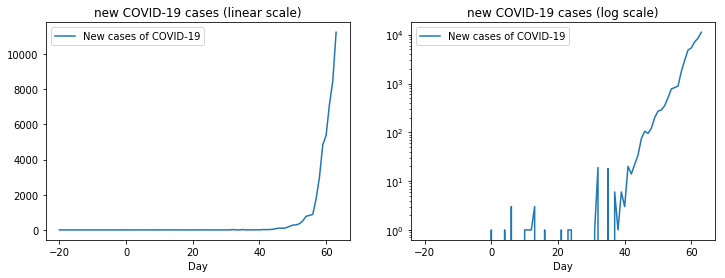

In [109]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

us.plot(ax=axes[0], x='Year', y='d1')
axes[0].legend(labels=['New cases of COVID-19'])
axes[0].set_yscale('linear')
axes[0].set_xlabel('Day')
axes[0].set_title('new COVID-19 cases (linear scale)')

us.plot(ax=axes[1], x='Year', y='d1')
axes[1].legend(labels=['New cases of COVID-19'])
axes[1].set_yscale('log')
axes[1].set_xlabel('Day')
axes[1].set_title('new COVID-19 cases (log scale)')

plt.show()


In [88]:
#Plot the 2nd derivative of cases (Change in new cases)
d2 = d1.diff(periods=1)


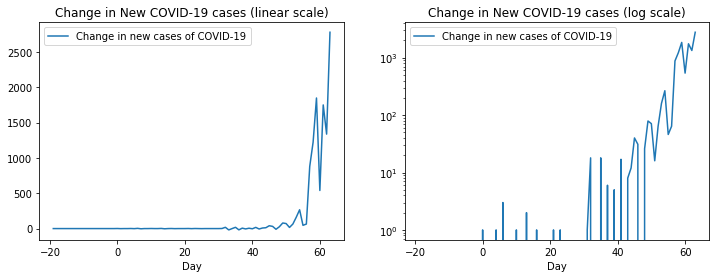

In [108]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

us.plot(ax=axes[0], x='Year', y='d2')
axes[0].legend(labels=['Change in new cases of COVID-19'])
axes[0].set_yscale('linear')
axes[0].set_xlabel('Day')
axes[0].set_title('Change in New COVID-19 cases (linear scale)')

us.plot(ax=axes[1], x='Year', y='d2')
axes[1].legend(labels=['Change in new cases of COVID-19'])
axes[1].set_yscale('log')
axes[1].set_xlabel('Day')
axes[1].set_title('Change in New COVID-19 cases (log scale)')

plt.show()


## Change in New COVID-19 Cases not Decelerating

The above chart shows that the change in new COVID-19 cases is not decreasing.  In the log scale it appears linear, which means it is accelerating exponentially.  Exponential growth is expected in the number of cases, or even the number of new cases, but if the effects of the lockdown are effective what we should expect to see is a flat line in the change in new cases.